In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans


In [3]:
b=sns.load_dataset("iris")

In [4]:
b.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


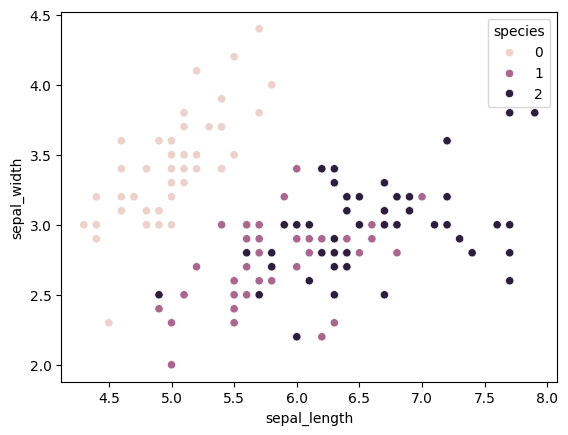

In [17]:
sns.scatterplot(x="sepal_length",y="sepal_width",data=b,hue="species")
plt.show()

<Axes: xlabel='sepal_length', ylabel='Count'>

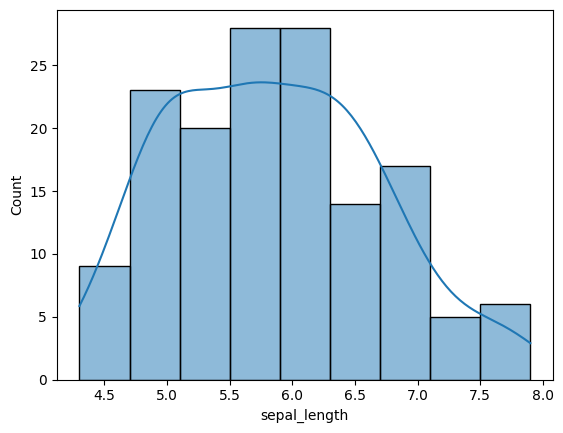

In [18]:
sns.histplot(b["sepal_length"],kde=True)

<Axes: xlabel='sepal_length', ylabel='count'>

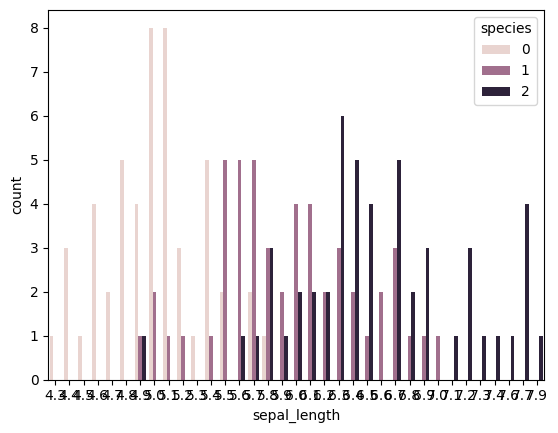

In [20]:
sns.countplot(x="sepal_length",data=b,hue="species")

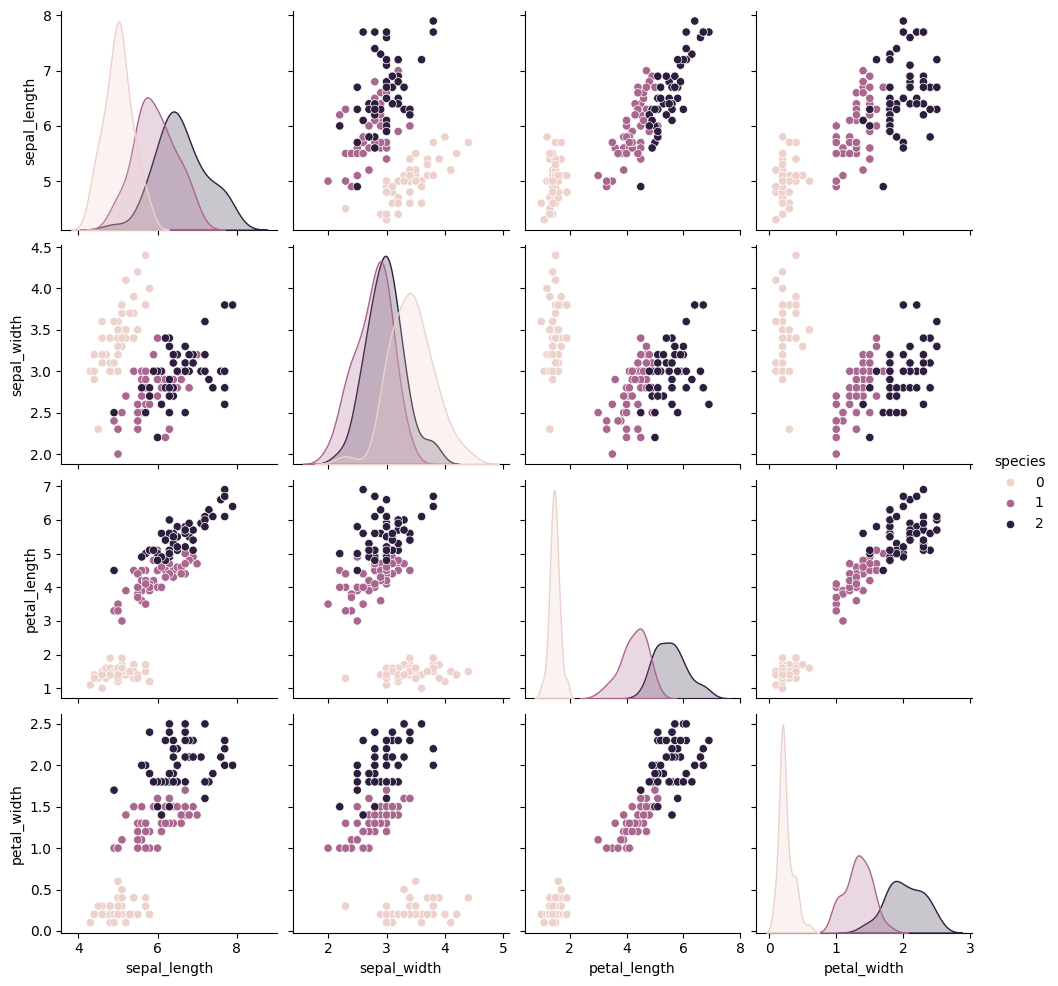

In [23]:
sns.pairplot(b,hue="species")

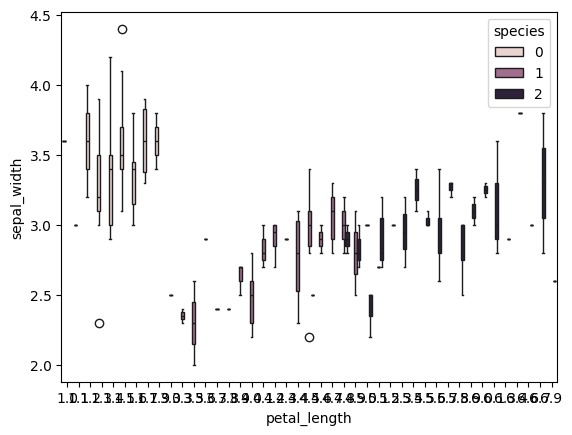

In [26]:
sns.boxplot(x="petal_length",y="sepal_width",data=b,hue="species")
plt.show()

<Axes: xlabel='species', ylabel='sepal_length'>

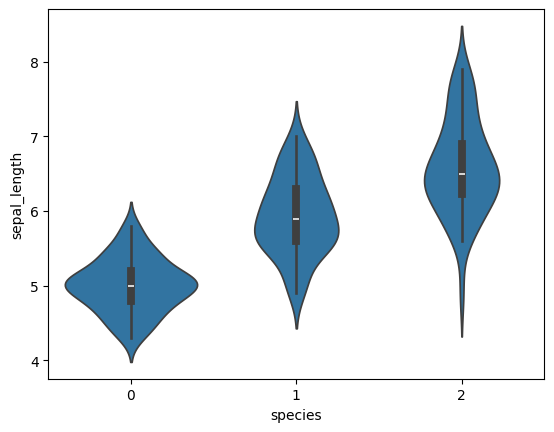

In [32]:
sns.violinplot(x="species",y="sepal_length",data=b)

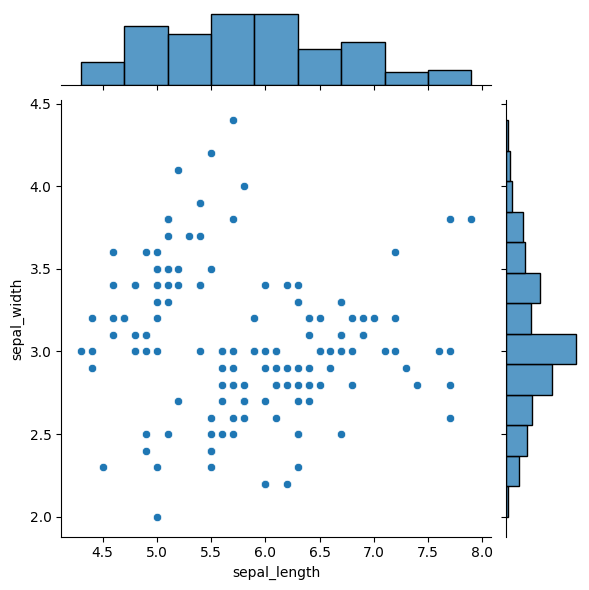

In [35]:
sns.jointplot(x="sepal_length",y="sepal_width",data=b)

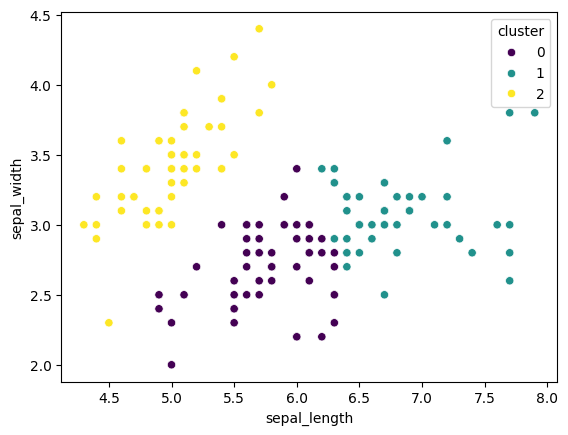

In [36]:
# KMeans Clustering Visualization (example)
kmeans = KMeans(n_clusters=3, random_state=0)
b['cluster'] = kmeans.fit_predict(b[['sepal_length', 'sepal_width']])
sns.scatterplot(x='sepal_length', y='sepal_width', data=b, hue='cluster', palette='viridis')
plt.show()

In [5]:
le=LabelEncoder()
b["species"]=le.fit_transform(b["species"])

In [6]:
b.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: >

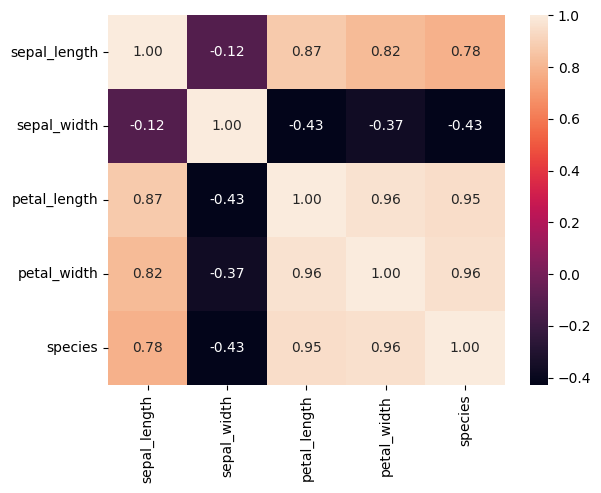

In [15]:
sns.heatmap(b.corr(),annot=True,fmt=".2f")

In [8]:
x=b

In [9]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [10]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [11]:
# K-Means model with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(x)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

y = b['species'].values

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 37 out of 150 samples were correctly labeled.
Accuracy score: 0.25


<ipython-input-12-a3d3f75030e2>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(1, 8), css, 'bx-', color='red')# marker='y'---- in this line bx another mention marker


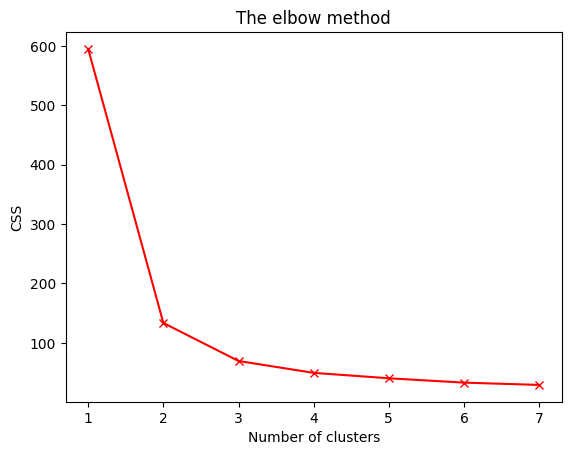

In [12]:
x=b.iloc[:,0:3].values

css=[]

# Finding inertia on various k values
for i in range(1,8):
    kmeans=KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 100, n_init = 10, random_state = 0).fit(x)
    css.append(kmeans.inertia_)

plt.plot(range(1, 8), css, 'bx-', color='red')# marker='y'---- in this line bx another mention marker
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('CSS')
plt.show()


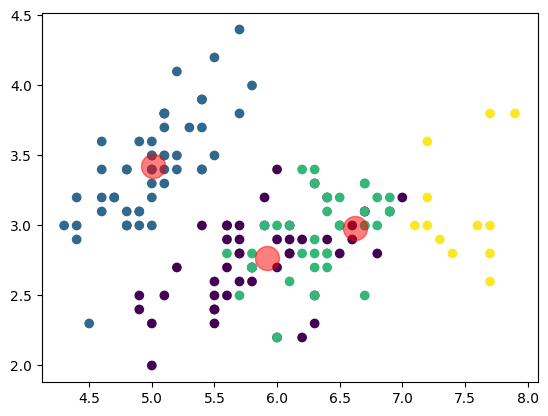

In [13]:
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.5)
plt.show()

ANOTHER METHOD OF KMEANS


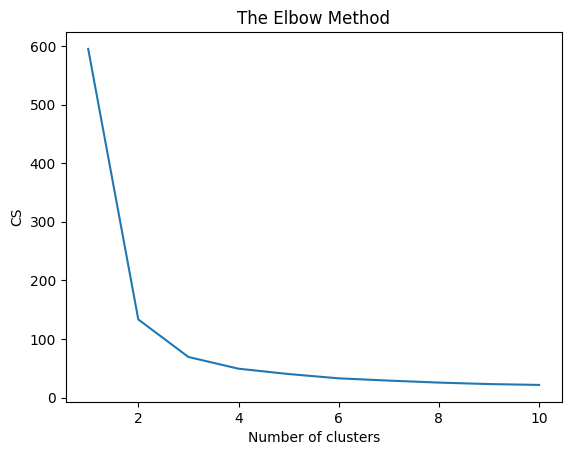

In [38]:
# Use elbow method to find optimal number of clusters
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()





# By the above plot, we can see that there is a kink at k=2.
# Hence k=2 can be considered a good number of the cluster to cluster this data.
# But, we have seen that I have achieved a weak classification accuracy of 1% with k=2.
# I will write the required code with k=2 again for convinience.

In [39]:
y_kmeans = kmeans.fit_predict(x)

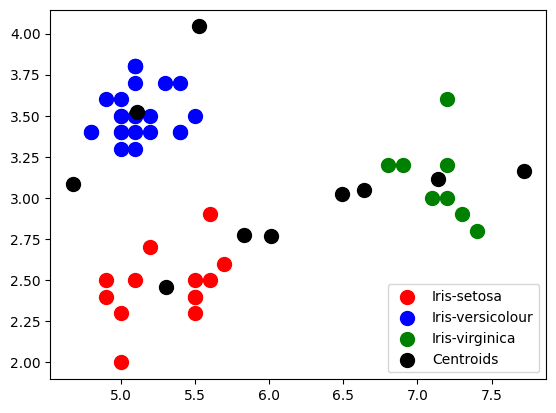

In [40]:

# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'black', label = 'Centroids')

plt.legend()





# import matplotlib.pyplot as plt

# # Define cluster colors and labels
# colors = ['red', 'blue', 'green']
# labels = ['Iris-setosa', 'Iris-versicolour', 'Iris-virginica']

# # Plotting the clusters
# for i in range(3):
#     plt.scatter(x[y_kmeans == i, 0], x[y_kmeans == i, 1],
#                 s=100, c=colors[i], label=labels[i])

# # Plotting the centroids
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
#             s=200, c='yellow', edgecolors='black', marker='X', label='Centroids')

# # Adding legend and displaying the plot
# plt.legend()
# plt.title('K-Means Clustering')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.grid(True)
# plt.show()








# Settin the data
# x=Data.iloc[:,0:3].values---------------------beacuse this line not mention in above --------use below code----------------



# Visualising the clusters - On the first two columns

# plt.scatter(x.iloc[y_k == 0, 0], x.iloc[y_k == 0, 1],

#             s = 100, c = 'red', label = 'Iris-setosa')

# plt.scatter(x.iloc[y_k == 1, 0], x.iloc[y_k == 1, 1],

#             s = 100, c = 'blue', label = 'Iris-versicolour')

# plt.scatter(x.iloc[y_k == 2, 0], x.iloc[y_k == 2, 1],

#             s = 100, c = 'green', label = 'Iris-virginica')

# # Plotting the centroids of the clusters

# plt.scatter(k.cluster_centers_[:, 0], k.cluster_centers_[:,1],

#             s = 100, c = 'black', label = 'Centroids')

# plt.legend()